<a href="https://colab.research.google.com/github/gksdydcks/Ai/blob/main/05_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 05.다중 선형회귀 실습

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

Epoch: 100/1000, Loss: 2.3357
Epoch: 200/1000, Loss: 2.0818
Epoch: 300/1000, Loss: 2.0779
Epoch: 400/1000, Loss: 2.0760
Epoch: 500/1000, Loss: 2.0742
Epoch: 600/1000, Loss: 2.0724
Epoch: 700/1000, Loss: 2.0706
Epoch: 800/1000, Loss: 2.0688
Epoch: 900/1000, Loss: 2.0671
Epoch: 1000/1000, Loss: 2.0653


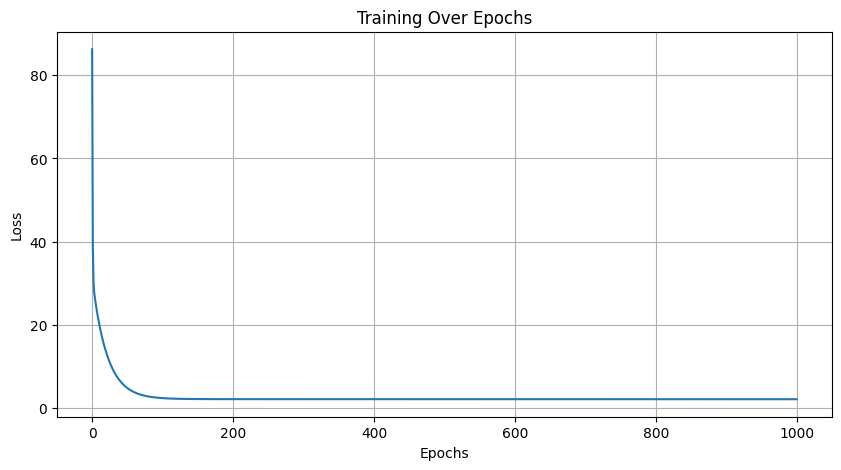

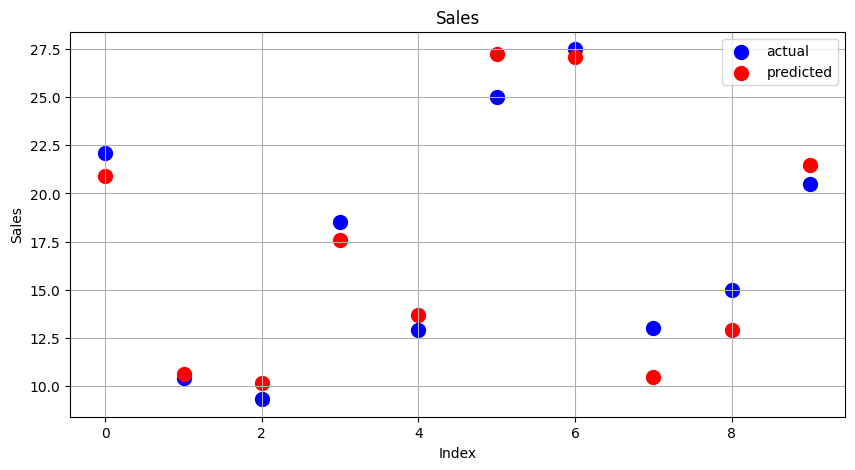

In [ ]:
###데이터 입출력
x = torch.tensor([[50.0, 25.0, 30.0],
                [10.0, 20.0, 25.0],
                [5.0, 22.0, 30.0],
                [30.0, 26.0, 28.0],
                [40.0, 15.0, 28.0],
                [60.0, 35.0, 40.0],
                [70.0, 30.0, 35.0],
                [20.0, 15.0, 20.0],
                [25.0, 18.0, 22.0],
                [45.0, 28.0, 30.0]], dtype=torch.float32)

y = torch.tensor([[22.1], [10.4], [9.3], [18.5], [12.9],
                [25.0], [27.5], [13.0], [15.0], [20.5]], dtype=torch.float32)

###모델 정의
class MultipleLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

model = MultipleLinearRegression()

###손실함수 정의
loss_function = nn.MSELoss()
###가중치 업데이트
optimizer = optim.SGD(model.parameters(),lr = 0.0001)
epochs = 1000
losses = []

###학습반복
for epoch in range(epochs):
  optimizer.zero_grad()#기울기 초기화
  outputs = model(x)
  loss = loss_function(outputs,y)
  loss.backward()
  optimizer.step()
  losses.append(loss.item())

  if (epoch+1) % 100 == 0:
    print(f'Epoch: {epoch+1}/{epochs}, Loss: {loss.item():.4f}')

###결과 시각화
plt.figure(figsize=(10,5))

#손실감소 그래프

plt.plot(losses)
plt.title("Training Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

#  데이터와 예측결과 시각화
plt.figure(figsize=(10,5))
predicted = model(x).detach().numpy()
actual = y.numpy()

plt.scatter(range(len(actual)),actual,label ="actual",color = "b",s=100)
plt.scatter(range(len(predicted)),predicted,label ="predicted",color = "r",s=100)
plt.xlabel("Index")
plt.ylabel("Sales")
plt.title("Sales")
plt.grid()
plt.legend()
plt.show()



### 실습2. 로지스틱 회귀 구현

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

[[ 1.49671415e+00  8.61735699e-01]
 [ 1.64768854e+00  2.52302986e+00]
 [ 7.65846625e-01  7.65863043e-01]
 [ 2.57921282e+00  1.76743473e+00]
 [ 5.30525614e-01  1.54256004e+00]
 [ 5.36582307e-01  5.34270246e-01]
 [ 1.24196227e+00 -9.13280245e-01]
 [-7.24917833e-01  4.37712471e-01]
 [-1.28311203e-02  1.31424733e+00]
 [ 9.19759245e-02 -4.12303701e-01]
 [ 2.46564877e+00  7.74223700e-01]
 [ 1.06752820e+00 -4.24748186e-01]
 [ 4.55617275e-01  1.11092259e+00]
 [-1.50993577e-01  1.37569802e+00]
 [ 3.99361310e-01  7.08306250e-01]
 [ 3.98293388e-01  2.85227818e+00]
 [ 9.86502775e-01 -5.77109290e-02]
 [ 1.82254491e+00 -2.20843650e-01]
 [ 1.20886360e+00 -9.59670124e-01]
 [-3.28186049e-01  1.19686124e+00]
 [ 1.73846658e+00  1.17136828e+00]
 [ 8.84351718e-01  6.98896304e-01]
 [-4.78521990e-01  2.80155792e-01]
 [ 5.39361229e-01  2.05712223e+00]
 [ 1.34361829e+00 -7.63040155e-01]
 [ 1.32408397e+00  6.14917720e-01]
 [ 3.23078000e-01  1.61167629e+00]
 [ 2.03099952e+00  1.93128012e+00]
 [ 1.60782477e-01  6

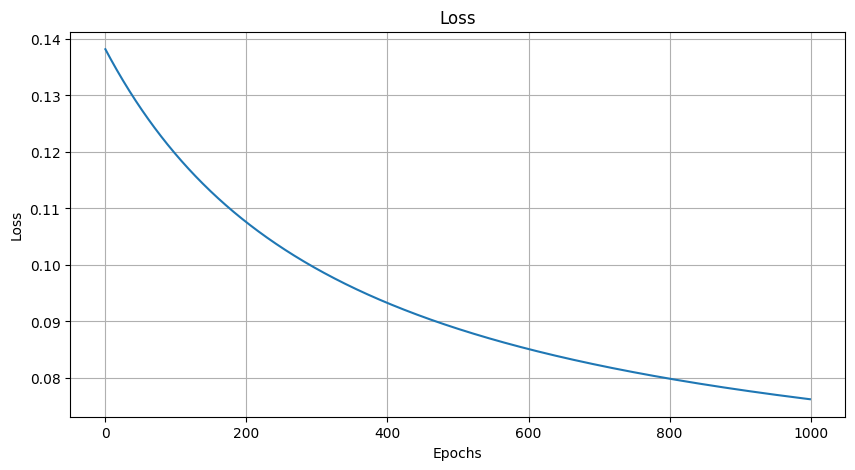

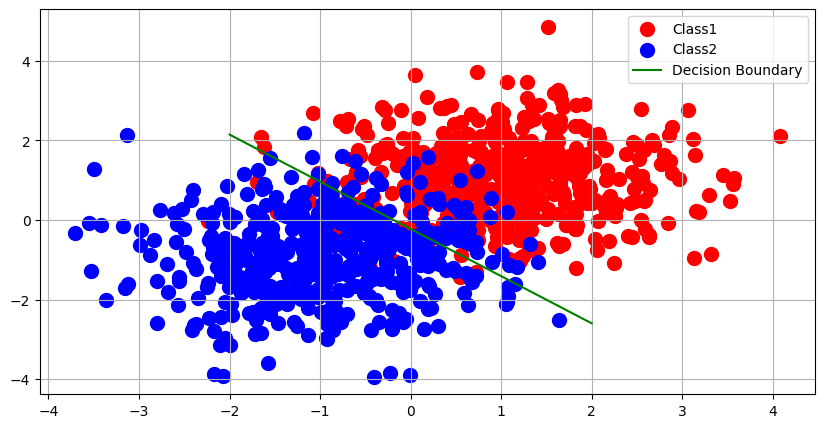

In [ ]:
####1. 입출력 정의
np.random.seed(42)
num_samples = 500

###1-1.
mean_1 = np.array([1.0,1.0])
cov_1 = np.array([[1,0],
                   [0,1]])  #x의 퍼짐정도 y의 퍼짐정도
data_1 = np.random.multivariate_normal(mean_1,cov_1,num_samples)
print(data_1)

###1-2.
mean_2 = np.array([-1.0,-1.0])
cov_2 = np.array([[1,0],
                   [0,1]])  #x의 퍼짐정도 y의 퍼짐정도
data_2 = np.random.multivariate_normal(mean_2,cov_2,num_samples)

data = np.vstack((data_1,data_2))  #데이터 합치기
data = torch.from_numpy(data).float()
labels = np.ones(num_samples*2) #1000개 생성
labels[num_samples:] = 0
labels =torch.from_numpy(labels).float().view(-1,1)
labels

####2.모델 정의
class LogisticRegression(nn.Module):
    def __init__(self,input_dim,output_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim,output_dim)

    def forward(self, x):
        out = self.linear(x)
        out = torch.sigmoid(out)
        return out
model = LogisticRegression(2,1)#모델생성

#### 3. 손실함수 정의
loss_fn =nn.BCELoss()
optimizer = optim.SGD(model.parameters(),lr = 0.01)
epochs = 1000
losses = []

#### 4.학습
for epoch in range(epochs):
  optimizer.zero_grad()#기울기 초기화
  outputs = model(data)
  loss = loss_function(outputs,labels)
  loss.backward()
  optimizer.step()
  losses.append(loss.item())

  if (epoch+1) % 100 == 0:
    print(f'Epoch: {epoch+1}/{epochs}, Loss: {loss.item():.4f}')

###5.결과 시각화
plt.figure(figsize=(10,5))
plt.plot(losses)
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

#  데이터와 예측결과 시각화
plt.figure(figsize=(10,5))
w= model.linear.weight.detach().numpy()
b= model.linear.bias.detach().numpy()

x1 = np.array([-2,2])
x2 =(-(w[0][0]*x1)-b[0])/w[0][1]
#0=w1*x1+w2*x2+b
#-(w1*x1) = w2*x2 +b
#-(w1*x1)-b=w2*x2
#(-(w1*x1)-b) w2=x2 =코드로 나타내야함

plt.scatter(data_1[:,0],data_1[:,1],label ="Class1",color = "r",s=100)
plt.scatter(data_2[:,0],data_2[:,1],label ="Class2",color = "b",s=100)
plt.plot(x1,x2,label ="Decision Boundary",color = "g")

plt.grid()
plt.legend()
plt.show()

### 실습3. FashionMNIST 신경망 구현
- 이미지 학습 > 클래스 분류

In [103]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
import torch.optim as optim

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)


cuda


In [102]:

# 1. 데이터 입출력 정의
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

# 2. 모델 정의
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
      nn.Linear(28*28, 512), # 입력층
      nn.BatchNorm1d(512),
      nn.ReLU(),
      nn.Linear(512, 256), # Layer 1
      nn.BatchNorm1d(256),
      nn.ReLU(),
      nn.Linear(256, 64), # Layer 2
      nn.BatchNorm1d(64),
      nn.ReLU(),
      nn.Linear(64, 10), # 출력층
    ) # [0.2, 2.1, 1.5, 0.4, ......]

  def forward(self, x):
    out = self.flatten(x)
    out = self.linear_relu_stack(out)
    return out

model = NeuralNetwork()
model.to(device) # GPU적용

# 3. 손실함수 정의
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 10

def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  for batch, (X, y) in enumerate(dataloader):
    optimizer.zero_grad()
    outputs = model(X)
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      loss = loss.item()
      current = batch * len(X)
      print(f"loss: {loss: .4f}, [{current} / {size}]")

def test_loop(dataloader, model, loss_fn):
  test_size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for X, y in dataloader:
      X = X.to(device)
      y = y.to(device)
      outputs = model(X)
      test_loss += loss_fn(outputs, y).item()
      correct += (outputs.argmax(1) == y).type(torch.float).sum().item()

  test_loss /= num_batches
  correct /= test_size
  print(f"Accuracy: {100*correct: .1f}, Avg loss: {test_loss}")


for epoch in range(epochs):
  print(f"Epoch: {epoch+1}----------------------")
  train_loop(train_dataloader, model, loss_fn, optimizer)
  test_loop(test_dataloader, model, loss_fn)
print("Complete!")

Epoch: 1----------------------


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [105]:
plot_img = input_img.squeeze().cpu().numpy()

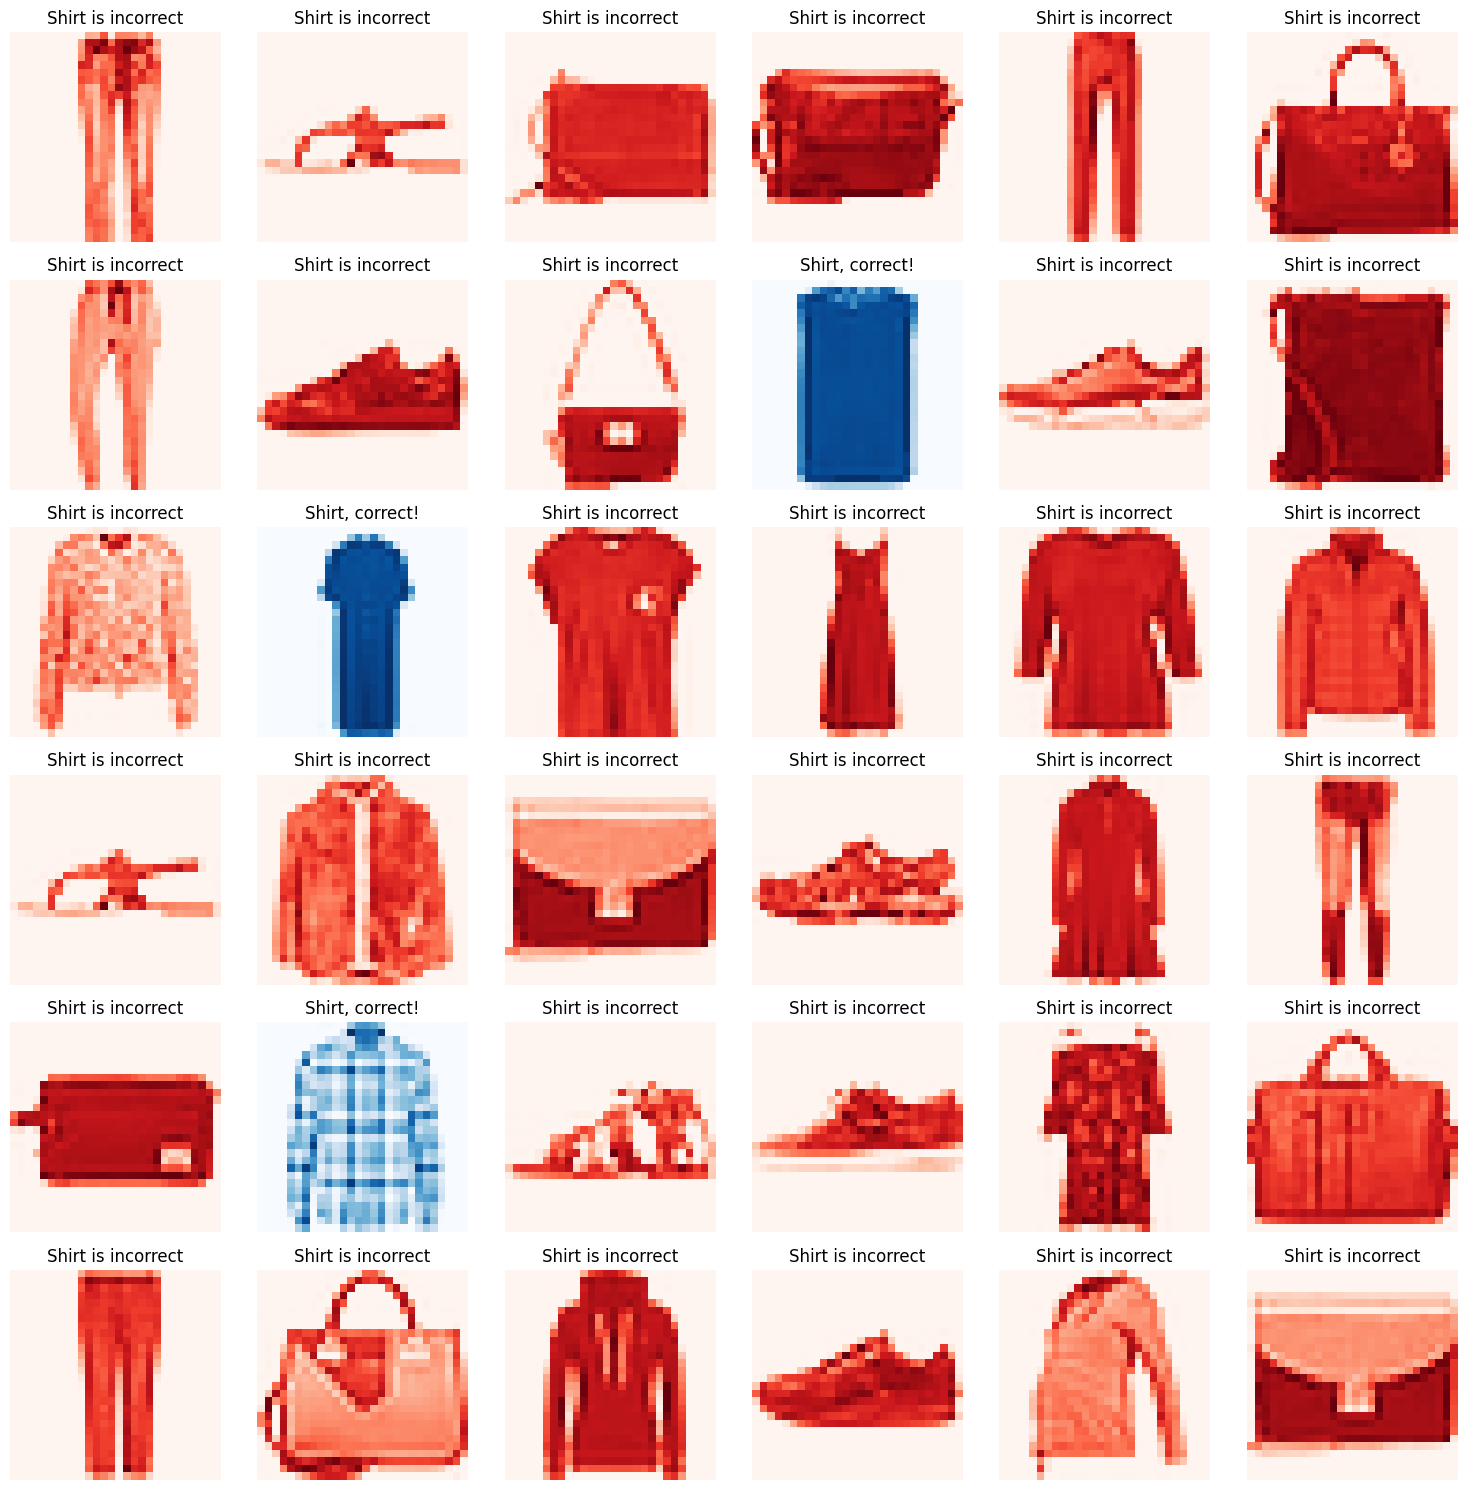

In [106]:
import matplotlib.pyplot as plt
import numpy as np

label_tags = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

columns = 6
rows = 6

fig = plt.figure(figsize=(15,15))
model.eval() # 모델을 평가모드로 변경

for i in range(1, columns * rows +1):
  data_idx = np.random.randint(len(test_dataloader))
  input_img = test_data[data_idx][0].to(device)
  label = test_data[data_idx][1]

  with torch.no_grad():
    output = model(input_img)
    _, prediction = torch.max(output, 1)
    pred_class = label_tags[prediction.item()]
    true_class = label_tags[label]

  title = f"{pred_class}, correct!" if pred_class == true_class else f"{pred_class} is incorrect"
  cmap = "Blues" if pred_class == true_class else "Reds"

  fig.add_subplot(rows, columns, i)
  plot_img = input_img.squeeze().cpu().numpy()
  plt.imshow(plot_img, cmap=cmap)
  plt.title(title)
  plt.axis("off")

plt.tight_layout()
plt.show()

### 실습4. CNN 구현